# Data Science & ML 
## Case Study 2


In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset cereal.csv.
data = pd.read_csv('cereal.csv')

print("Info of the dataset:")
print(data.info())
print("-"*50) 
print("Check for null values in the dataset:")
print(data.isnull().sum())
print("-"*50) 
print("Print the first rows from the dataset:")
print(data.head())


Info of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB
None
--------------------------------------------------
Check for null values in the dataset:
name        0
mfr 

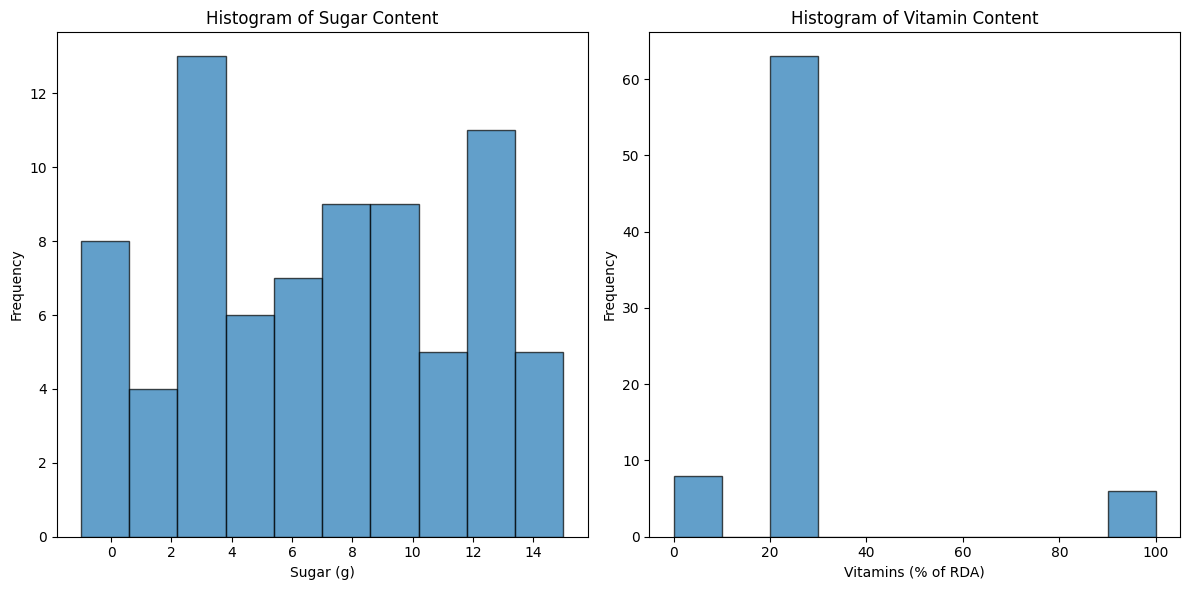

In [66]:
#1 
# Plot histograms
plt.figure(figsize=(12, 6))

# Histogram for sugar content
plt.subplot(1, 2, 1)
plt.hist(data['sugars'], bins=10, edgecolor='black', alpha=0.7)
plt.title('Histogram of Sugar Content')
plt.xlabel('Sugar (g)')
plt.ylabel('Frequency')

# Histogram for vitamin content
plt.subplot(1, 2, 2)
plt.hist(data['vitamins'], bins=10, edgecolor='black', alpha=0.7)
plt.title('Histogram of Vitamin Content')
plt.xlabel('Vitamins (% of RDA)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

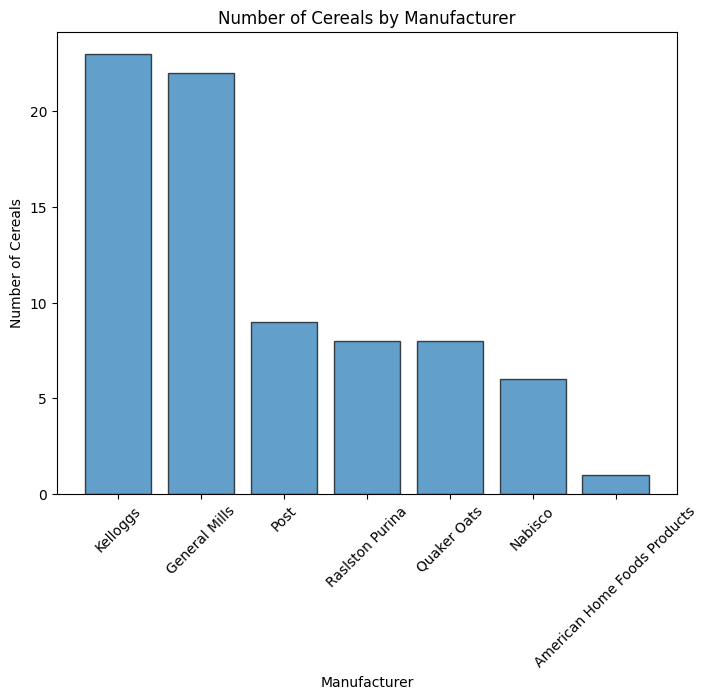

manufacturer_full
Kelloggs                        23
General Mills                   22
Post                             9
Raslston Purina                  8
Quaker Oats                      8
Nabisco                          6
American Home Foods Products     1
Name: count, dtype: int64


In [67]:
# 2. Create a new column with full manufacturer names and plot a bar chart

# Mapping manufacturer codes to full names
manufacturer_mapping = {
    'N': 'Nabisco',
    'Q': 'Quaker Oats',
    'K': 'Kelloggs',
    'R': 'Raslston Purina',
    'G': 'General Mills',
    'P': 'Post',
    'A': 'American Home Foods Products'
}

# Add a new column with full manufacturer names
data['manufacturer_full'] = data['mfr'].map(manufacturer_mapping)

# Count the number of cereals by manufacturer
manufacturer_counts = data['manufacturer_full'].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 6))
plt.bar(manufacturer_counts.index, manufacturer_counts.values, alpha=0.7, edgecolor='black')
plt.title('Number of Cereals by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Cereals')
plt.xticks(rotation=45)
plt.show()

print(manufacturer_counts)


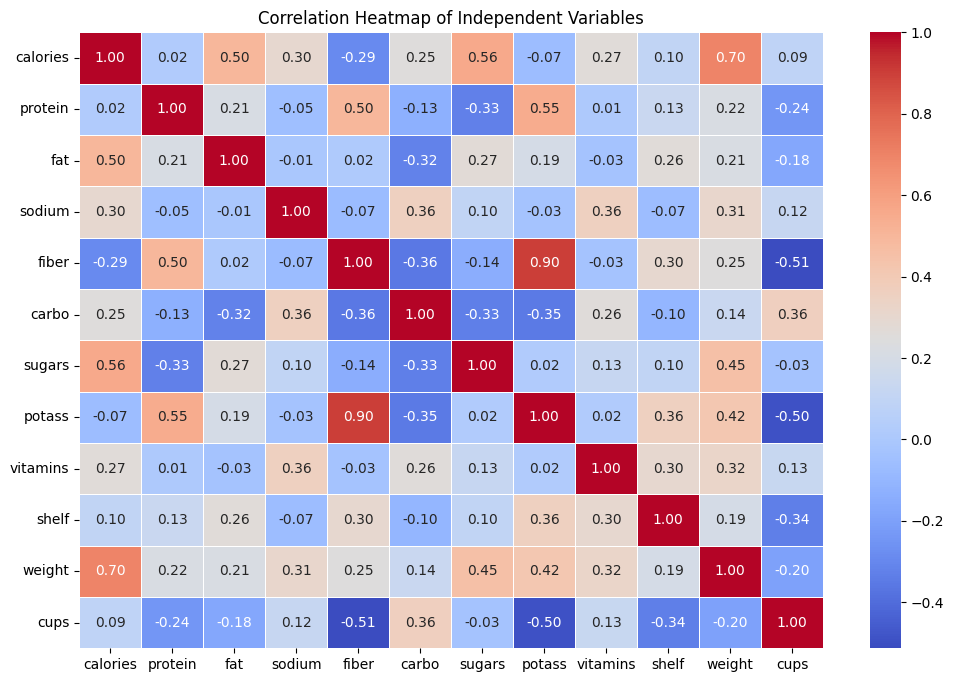

Highly correlated pair: potass and fiber with correlation 0.9033736685942043
Highly correlated pair: weight and calories with correlation 0.6960910769169041
Features to drop: ['weight', 'potass']
Training data shape: (57, 10)
Test data shape: (20, 10)
    calories  protein  fat  sodium  fiber  carbo  sugars  vitamins  shelf  \
30       100        2    0      45    0.0   11.0      15        25      1   
40       110        2    1     260    0.0   21.0       3        25      2   
39       140        3    1     170    2.0   20.0       9       100      3   
16       100        2    0     290    1.0   21.0       2        25      1   
65        90        3    0       0    3.0   20.0       0         0      1   

    cups  
30  0.88  
40  1.50  
39  0.75  
16  1.00  
65  0.67  


In [68]:
# 3. Extract target and predictors, split the data

# Import necessary libraries
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1. Define the target variable (y) and predictors (x)
# The 'rating' column is the target, and the predictors are all numeric columns except 'rating'.
y = data['rating']
x = data.select_dtypes(include=['int64', 'float64']).drop(columns=['rating'])

# Step 2. Compute the correlation matrix for feature selection
correlation_matrix = x.corr()

# Function to drop highly correlated features
def drop_highly_correlated(corr_matrix, threshold=0.9):
    """
    Identifies and returns features to drop based on a correlation threshold.
    Only the lower triangle of the correlation matrix is scanned to avoid redundancy.
    """
    to_drop = set()  # Set to keep track of features to drop
    cols = corr_matrix.columns

    # Iterate over the lower triangle of the matrix
    for i in range(len(cols)):
        for j in range(i):  # Only check lower triangle (j < i)
            if abs(corr_matrix.iloc[i, j]) > threshold:  # Check if correlation exceeds the threshold
                print(f"Highly correlated pair: {cols[i]} and {cols[j]} with correlation {abs(corr_matrix.iloc[i, j])}")
                to_drop.add(cols[i])  # Add one of the features to the set
    
    return list(to_drop)

# Step 3. Visualize the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Independent Variables")
plt.show()

# Identify redundant features with a threshold of 0.68
redundant_features = drop_highly_correlated(correlation_matrix, threshold=0.68)
print(f"Features to drop: {redundant_features}")

# Drop redundant features from the dataset
x_reduced = x.drop(columns=redundant_features)

#Step  4. Split the data into training and testing sets
# 75% of the data is used for training, and 25% for testing
x_train, x_test, y_train, y_test = train_test_split(x_reduced, y, test_size=0.25, random_state=42)

print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

# Display a preview of the training data
print(x_train.head())





In [69]:
# 4. Fit a linear regression model and evaluate mean squared error

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Step 1: Fit a linear regression model and evaluate performance
# Initialize the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(x_train, y_train)

# Display the coefficients of the linear regression model
print("Coefficients: ", model.coef_)

# Make predictions on the test data
y_pred = model.predict(x_test)

# Calculate the Mean Squared Error (MSE) on the test data
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Data: {mse:.2f}")

# Step 2: Perform Cross-Validation
# Evaluate the model using 5-fold cross-validation
cv_scores = cross_val_score(model, x_reduced, y, cv=5, scoring='r2')
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean CV R²: {cv_scores.mean():.4f}")



Coefficients:  [-0.22140948  2.98332938 -2.07671607 -0.05408762  2.61721877  1.05226752
 -0.80333669 -0.05374602 -0.13755986  0.63127598]
Mean Squared Error on Test Data: 1.15
Cross-Validation R² Scores: [0.99545177 0.99201605 0.9913534  0.98657617 0.99529792]
Mean CV R²: 0.9921


### **1. Mean Squared Error (MSE)**

$$MSE = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$

#### **Where:**
* 𝑛: Number of data points.
* $𝑦_𝑖$ : Actual value of the target variable for the 𝑖𝑡ℎ observation.
* $\hat{y}_i$ Predicted value by the model for the 𝑖𝑡ℎ observation.

#### **Meaning:**
* MSE is the average squared difference between the actual and predicted values.
* It penalizes larger errors more heavily due to squaring.
* A lower MSE indicates better model performance, with 0 being the ideal (perfect predictions).

#### **Interpretation:**
* MSE is in the same units as the square of the target variable.
* For example, if rating is measured in points, MSE is in points squared.
* While useful for comparison, it lacks intuitive interpretability since it doesn’t represent actual error magnitude.

---

### **2. Coefficient of Determination ($𝑅^2$)**

$$R^2 = 1 - \frac{\text{SS}_{\text{res}}}{\text{SS}_{\text{tot}}}$$

#### **Where:**

* $ SS_{\text{res}} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $: Residual sum of squares (unexplained variance).
* $ SS_{\text{tot}} = \sum_{i=1}^{n} (y_i - \bar{y})^2 $ Total sum of squares (variance in the target variable).
* $ \bar{y} $: Mean of the actual target values.

#### **Meaning:**

* $ R^2 $ measures the proportion of variance in the target variable explained by the model.
* Values range from $ 0 $  to $ 1 $:
* $ R^2 = 1 $: Perfect fit; the model explains all variance.
* $ R^2 = 0 $: The model explains no variance (equivalent to predicting the mean of $ y $).
* Negative $ R^2 $: The model performs worse than simply predicting the mean.


#### **Interpretation:**

- $ R^2 = 0.99 $: The model explains 99% of the variance in the target variable.
- While $ R^2 $ is useful, it does not penalize overfitting and may appear high for overly complex models.

